<a href="https://colab.research.google.com/github/vskarich2/cs230_f2024_final_project/blob/main/cs230_final_project_proof_of_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q datasets --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you'll have fsspec 2024.9.0 which is incompatible.


In [3]:
import json
from google.colab import drive

captions = [{"file_name": "1000268201_693b08cb0e.jpg", "text": "A girl four meters away going into a wooden building."},
{"file_name": "1001773457_577c3a7d70.jpg", "text": "A black dog and a spotted dog are fighting one meter away."},
{"file_name": "1002674143_1b742ab4b8.jpg", "text": "Four meters away a young girl with pigtails painting outside in the grass."},
{"file_name": "1003163366_44323f5815.jpg", "text": "Two meters away a man lays on a bench while his dog sits by him."},
{"file_name": "1007129816_e794419615.jpg", "text": "A man one meter away wears an orange hat and glasses."},
{"file_name": "1007320043_627395c3d8.jpg", "text": "A child one meter away playing on a rope net."},]

drive.mount('/content/drive')

# path to the folder containing the images
root = "/content/drive/MyDrive/cs230_final_project_test/imagefolder/"

# add metadata.jsonl file to this folder
with open(root + "metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item) + "\n")

Mounted at /content/drive


In [4]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir=root, split="train")

Generating train split: 0 examples [00:00, ? examples/s]

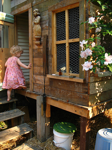

In [5]:
example = dataset[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

Let's check its corresponding caption:

In [6]:
example["text"]

'A girl four meters away going into a wooden building.'

In [7]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [8]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [9]:
train_dataset = ImageCaptioningDataset(dataset, processor)

Let's check one example of the dataset:

In [10]:
item = train_dataset[0]
for k,v in item.items():
  print(k,v.shape)

Legacy behavior is being used. The current behavior will be deprecated in version 5.0.0. In the new behavior, if both images and text are provided, the last token (EOS token) of the input_ids and attention_mask tensors will be removed. To test the new behavior, set `legacy=False`as a processor call argument.


input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [12]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [13]:
processor.decode(batch["input_ids"][0])

'[CLS] two meters away a man lays on a bench while his dog sits by him. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

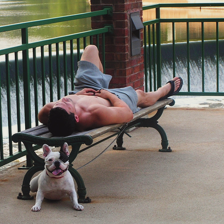

In [14]:
from PIL import Image
import numpy as np

MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [15]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

## Dummy forward pass

It's always good to check the initial loss on a batch. See also the blog above.

In [16]:
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(12.1401, grad_fn=<NllLossBackward0>)

## Train the model

Next, let's train the model! We use native PyTorch here.

As I created a super tiny dataset just for demo purposes, we'll let the model overfit it. If it's capable of overfitting it (i.e. achieve zero loss), then that's a great way to know that everything is working properly. See also the blog above.

In [17]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Loss: 12.539521217346191
Loss: 10.46357536315918
Loss: 9.99971866607666
Epoch: 1
Loss: 9.763172149658203
Loss: 9.567049980163574
Loss: 9.336133003234863
Epoch: 2
Loss: 9.12911605834961
Loss: 8.974065780639648
Loss: 8.7713041305542
Epoch: 3
Loss: 8.650344848632812
Loss: 8.478094100952148
Loss: 8.374791145324707
Epoch: 4
Loss: 8.265291213989258
Loss: 8.150640487670898
Loss: 8.00354290008545
Epoch: 5
Loss: 7.923432350158691
Loss: 7.8176116943359375
Loss: 7.707340717315674
Epoch: 6
Loss: 7.5944600105285645
Loss: 7.499517917633057
Loss: 7.423660755157471
Epoch: 7
Loss: 7.270207405090332
Loss: 7.215488910675049
Loss: 7.121508598327637
Epoch: 8
Loss: 6.968142509460449
Loss: 6.912846088409424
Loss: 6.81427526473999
Epoch: 9
Loss: 6.682692527770996
Loss: 6.577391147613525
Loss: 6.500694274902344
Epoch: 10
Loss: 6.369015216827393
Loss: 6.2628889083862305
Loss: 6.185449600219727
Epoch: 11
Loss: 6.0735273361206055
Loss: 5.944896697998047
Loss: 5.848505020141602
Epoch: 12
Loss: 5.725844383239746
Lo

## Inference

Now that we've trained the model, let's load the first image and perform inference on it. In the training set, the caption reads: "A girl four meters away going into a wooden building."

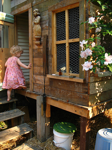

In [18]:
# load image
example = dataset[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [19]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a girl four meters away going into a wooden building.


Great! We've successfully fine-tuned GIT on our tiny (image, text) dataset as a proof of concept that we can generate captions with distance information.